In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from pprint import pprint

In [2]:
font = fm.FontProperties(fname='SimSun.ttf')
with open('name_dict.txt', encoding='utf-8') as f1:
    names = f1.readlines()
with open('content_cut.txt', encoding='utf-8') as f2:
    content = f2.read()

In [3]:
count = {}
for name in names:
    count[name.strip()] = content.count(name.strip())
pprint(count)

{'丁义珍': 105,
 '丁义珍司机': 0,
 '丁妻': 0,
 '丁海峰': 0,
 '丁秀萍': 6,
 '于诚群': 0,
 '交警': 3,
 '何阿三': 4,
 '侯亮平': 486,
 '侯亮平司机': 0,
 '便衣警察': 0,
 '出租车司机': 0,
 '刘姗': 0,
 '刘局长': 0,
 '刘新建': 72,
 '刘生': 3,
 '刘若谷': 0,
 '办证人': 0,
 '包云飞': 0,
 '华人女老板': 0,
 '司机小钱': 2,
 '吕梁': 25,
 '吴心仪': 6,
 '吴惠芬': 43,
 '吴春林': 3,
 '周桂春': 0,
 '周正': 23,
 '大汉乙': 0,
 '大汉甲': 0,
 '头目乙': 0,
 '孙妻': 0,
 '孙海平': 5,
 '孙连城': 22,
 '季昌明': 65,
 '小学校长': 0,
 '小皮球': 24,
 '尤瑞星': 18,
 '工人小陈': 0,
 '工头': 0,
 '常委乙': 0,
 '常委甲': 0,
 '常成虎': 6,
 '张主任': 0,
 '张天峰': 0,
 '律师甲': 0,
 '拳击教练': 0,
 '易学习': 52,
 '李总': 0,
 '李昕岳': 0,
 '李梁': 0,
 '李达康': 226,
 '李达康司机': 0,
 '杜伯仲': 17,
 '林华华': 44,
 '林建国': 0,
 '林老师': 0,
 '梁璐': 26,
 '欧阳培龙': 0,
 '欧阳菁': 83,
 '毕敬业': 4,
 '毛娅': 8,
 '汤成兰': 1,
 '沈晓海': 0,
 '沙瑞金': 150,
 '法官乙': 0,
 '法官甲': 0,
 '渔家女乙': 0,
 '渔家女甲': 0,
 '烟店老板': 0,
 '照相师': 0,
 '王主任': 0,
 '王国风': 0,
 '王大路': 26,
 '王少林': 0,
 '王总': 0,
 '王文革': 13,
 '王老板': 0,
 '王院长': 0,
 '王馥真': 4,
 '田主任': 0,
 '田国富': 35,
 '田杏枝': 0,
 '白处长': 0,
 '看门人': 0,
 '眼镜王': 0,
 '祁同伟': 202,
 '秃顶男': 0,
 '秦奔': 1,
 

人物出现次数统计

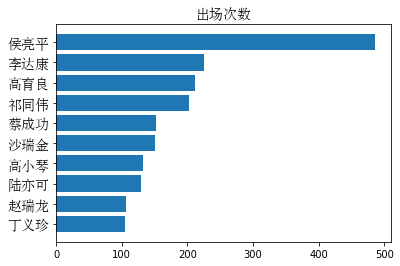

In [4]:
count = sorted(count.items(), key=lambda x: x[1])
ay, ax = plt.subplots()
numbers = [x[1] for x in count[-10:]]
names = [x[0] for x in count[-10:]]
ax.barh(range(10), numbers, align='center')
ax.set_title('出场次数', fontsize=14, fontproperties=font)
ax.set_yticks(range(10))
ax.set_yticklabels(names, fontsize=14, fontproperties=font)
plt.show()

分集

In [5]:
episodes = []
episode = ""
for i in content.split('\n'):
    if i == '':
        episodes.append(episode)
        episode = ""
    else:
        episode += i + ' '

出现在同一个句子中的人物视为有关系，并将人物的其他称呼转换为正式称呼

In [6]:
# print(episodes)
with open('./user_name_dict.txt', 'r', encoding='utf-8') as f:
    names = f.readlines()
names = [i.strip() for i in names]
# names = ['侯亮平', '李达康']
pprint(names)
replace_words = {'师母': '吴慧芬', '陈老': '陈岩石', '老赵': '赵德汉', '达康': '李达康', '高总': '高小琴',
                 '猴子': '侯亮平', '老郑': '郑西坡', '小艾': '钟小艾', '老师': '高育良', '同伟': '祁同伟',
                 '赵公子': '赵瑞龙', '郑乾': '郑胜利', '孙书记': '孙连城', '赵总': '赵瑞龙', '昌明': '季昌明',
                 '沙书记': '沙瑞金', '郑董': '郑胜利', '宝宝': '张宝宝', '小高': '高小凤', '老高': '高育良',
                 '伯仲': '杜伯仲', '老杜': '杜伯仲', '老肖': '肖钢玉', '刘总': '刘新建', "美女老总": "高小琴"}

wordcount = len(names)
content_word = content.split('\n')
# content_word = episodes
relation = [[0 for col in range(wordcount)] for row in range(wordcount)]

for col_index in range(len(names)):
    for row_index in range(len(names)):
        num = 0
        for line in content_word:
            if names[col_index].strip() in line and names[row_index].strip() in line:
                num += 1
        tmp_col = col_index
        tmp_row = row_index
        if names[col_index].strip() in replace_words:
            tmp_col = names.index(replace_words[names[col_index].strip()])
        if names[row_index].strip() in replace_words:
            tmp_row = names.index(replace_words[names[row_index].strip()])
        relation[tmp_col][tmp_row] += num

['侯亮平',
 '李达康',
 '沙瑞金',
 '吴慧芬',
 '高育良',
 '祁同伟',
 '陆亦可',
 '钟小艾',
 '高小琴',
 '吴惠芬',
 '欧阳菁',
 '赵瑞龙',
 '郑西坡',
 '赵东来',
 '梁璐',
 '季昌明',
 '程度',
 '丁义珍',
 '陈海',
 '赵德汉',
 '林华华',
 '周正',
 '陈岩石',
 '刘新建',
 '蔡成功',
 '王馥真',
 '易学习',
 '田国福',
 '陈清泉',
 '刘姗',
 '陈群芳',
 '田杏枝',
 '张宝宝',
 '郑胜利',
 '孙连城',
 '肖钢玉',
 '吴心怡',
 '王大路',
 '秦局长',
 '周桂春',
 '王文革',
 '白处长',
 '孙海平',
 '毛娅',
 '张树立',
 '吴春林',
 '马文明',
 '金秘书',
 '侯浩然',
 '常成虎',
 '小皮球',
 '汤成兰',
 '李梁',
 '毕敬业',
 '何阿三',
 '张天峰',
 '尤瑞星',
 '陈文强',
 '杜伯仲',
 '高小凤',
 '美女老总',
 '老程',
 '师母',
 '陈老',
 '老赵',
 '赵德汉',
 '达康',
 '高总',
 '猴子',
 '老郑',
 '小艾',
 '老师',
 '同伟',
 '赵公子',
 '郑乾',
 '孙书记',
 '赵总',
 '昌明',
 '沙书记',
 '郑董',
 '宝宝',
 '小高',
 '老高',
 '伯仲',
 '老杜',
 '老肖',
 '刘总']


In [7]:
cor_matrix = np.matrix(relation)
for i in range(len(names)):
    cor_matrix[i, i] = 0

social_contact = pd.DataFrame(columns=['name1', 'name2', 'frequency'])
for i in range(0, len(names)):
    for j in range(0, len(names)):
        if i < j and relation[i][j] > 0:
            social_contact.loc[len(social_contact), 'name1'] = names[i]
            social_contact.loc[len(social_contact) - 1, 'name2'] = names[j]
            social_contact.loc[len(social_contact) - 1, 'frequency'] = relation[i][j]

social_contact.to_csv('social_contact.csv', index=False)

In [8]:
text = []

for line in content_word:
    if '山水集团' in line:
        text.append(line)

pprint(text)

['郑西坡 得知 护厂 工人 强烈抗议 拆迁 山水集团 找 警察 维持秩序 陈岩石 觉得 经济纠纷 派 警察 赶忙 京州市 警察局长 赵东来 打电话 赵东来 '
 '长 根本 不知情 肯定 说 假警察',
 '李达康 短会 接近 尾声 最后 问题 下岗职工 安置 问题 李达康 得知 蔡成功 高小琴 曾经 有过 补充 合同 明确指出 不 安置 工人 李达康 觉得 '
 '里面 一定 问题 怀疑 蔡成功 勾结 山水集团 转让 股权 嫌疑 李达康 提出 此事 严查',
 '沙瑞金 陈岩石 讲讲 大风厂 事件 陈岩石 说 都 腐败 结 恶果 山水集团 高小琴 白手起家 几年 时间 达到 几百亿 资产 不是 高小琴 丁义珍 '
 '关系 好 不到 大风厂 高小琴 五千万 得到 大风厂 价值 十亿 工人 股份 占 百分之四十',
 '散会 后 赵东来 找 李达康 投诉 激动 地称 高小琴 赚 多钱 不让 钱 山水集团 到底 背景 赵东来 不能 动用 维稳 资金 主动 要求 辞职 '
 '李达康 无奈 苦笑 答应 想 办法 解决 一千万 李达康 已经 请 两个 律师 去 好好 查一查 大风厂 权益 问题',
 '后来 蔡成功 过桥 贷款 方式 山水集团 贷 五千万 高利贷 用于 大风厂 生产 约定 六天 时间 还清 大风厂 全部 股权 做 抵押 欧阳菁 取消 '
 '蔡成功 事先 预约 贷款',
 '三个 月 以后 京州 人民法院 抵押 协议 大风厂 全部 股权 判给 山水集团 工人 恨 蔡成功 以为 勾结 高小琴 骗 大家',
 '郑乾 劝说 郑西坡 在家 颐养天年 以后 家 针对 大风厂 职工 股份 问题 多方 咨询 持股 职工 不能 告 山水集团 只能 告 蔡成功 必须 承认 '
 '没有 职工 同意 抵押 股权',
 '郑西坡 告诉 蔡成功 政府 明天 派 工作组 律师 进入 大风厂 帮 打官司 起诉 山水集团',
 '欧阳菁 冷笑 那点 工资 能够 负担 孩子 美国 费用 最后 欧阳菁 答应 李达康 离婚 条件 山水集团 项目 大路 集团 王大路',
 '高小琴 李达康 决定 非常 愤怒 山水集团 政府 垫付 大风厂 钱 还 土地 重新 招拍 挂',
 '侯亮平 大家 一起 总结 这次 审讯 觉得 侦查 方向 错 六 背后 腐败问题 职务犯罪 问题 依然 存在 蔡成功 

In [9]:
import jieba
from jieba import analyse

jieba.load_userdict("./user_name_dict.txt")
jieba.load_userdict("./user_place_dict.txt")
sentence = " ".join(text)
keywords = analyse.extract_tags(sentence, topK=20)
pprint(keywords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\rycbar\AppData\Local\Temp\jieba.cache
Loading model cost 1.277 seconds.
Prefix dict has been built successfully.


['山水集团',
 '蔡成功',
 '陈岩石',
 '高小琴',
 '大风厂',
 '李达康',
 '侯亮平',
 '刘新建',
 '赵东来',
 '丁义珍',
 '赵瑞龙',
 '欧阳菁',
 '王文革',
 '过桥',
 '郑西坡',
 '油汽',
 '律师',
 '庆祝',
 '问题',
 '彩霞']


In [10]:
import gensim

sentences = [i.split(' ') for i in content_word]

model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

pprint(model.wv['山水集团'])

for k, s in model.wv.most_similar(positive=['山水集团'], topn=20):
    print(k, s)

array([-0.03179613,  0.10182843,  0.01152786,  0.07793745,  0.04429642,
       -0.2901609 ,  0.07843419,  0.35246113, -0.1090978 , -0.08547769,
       -0.07979131, -0.20420307, -0.1502633 , -0.04623213, -0.02135815,
       -0.11342517,  0.00806131, -0.235532  ,  0.01063696, -0.42212093,
        0.16126326,  0.16041778,  0.12392271, -0.10792834, -0.06015193,
        0.05832294, -0.13781941, -0.06911182, -0.14029384,  0.09104802,
        0.17322704,  0.0489555 ,  0.07605336, -0.04045817, -0.15645784,
        0.25486362,  0.02393764, -0.1668981 , -0.12488644, -0.32792345,
        0.03300639, -0.24225011, -0.14043377, -0.04449811,  0.17809013,
       -0.05013553, -0.18505223, -0.07525443,  0.1296155 ,  0.12312587,
        0.05157623, -0.19025606,  0.02292922, -0.01219451, -0.09325591,
        0.14984311,  0.00335542,  0.02271255, -0.2213108 ,  0.04305127,
        0.0326754 ,  0.01004403,  0.00651105, -0.16952457, -0.14183989,
        0.16654664,  0.09263804,  0.25918344, -0.27115074,  0.20

c:\users\rycbar\appdata\local\programs\python\python39\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [11]:
import networkx as nx

G = nx.DiGraph()

for i in range(0, len(names)):
    for j in range(0, len(names)):
        if i < j and relation[i][j] > 0:
            G.add_weighted_edges_from([(names[i], names[j], relation[i][j])])

pagerank_list = nx.pagerank(G, max_iter=1000)
pagerank_list = sorted(pagerank_list.items(), key=lambda item: -item[1])
print("PageRank:")
pprint(pagerank_list)

PageRank:
[('赵德汉', 0.1615248379968378),
 ('尤瑞星', 0.07555119224817103),
 ('蔡成功', 0.04845464520029051),
 ('郑胜利', 0.04070940062832761),
 ('张树立', 0.037479658773209426),
 ('小皮球', 0.02740341119880509),
 ('肖钢玉', 0.024084742294496555),
 ('汤成兰', 0.02330278459620981),
 ('毛娅', 0.02327778077796117),
 ('陈清泉', 0.02292079574923944),
 ('陈岩石', 0.02208117405572353),
 ('陈海', 0.021581160110470142),
 ('孙海平', 0.019182937363188435),
 ('刘新建', 0.017990517731422656),
 ('丁义珍', 0.01781955850048483),
 ('马文明', 0.017551381731224953),
 ('祁同伟', 0.01746016956561701),
 ('陈群芳', 0.0165895332596003),
 ('季昌明', 0.01655062758811033),
 ('王文革', 0.015937541809673404),
 ('吴心怡', 0.015710759278363864),
 ('周正', 0.015398965301985108),
 ('杜伯仲', 0.014809427190755703),
 ('赵瑞龙', 0.014713426876718706),
 ('林华华', 0.014677282854813314),
 ('高小琴', 0.012887827103605127),
 ('王大路', 0.01234181445592908),
 ('梁璐', 0.011974468140771865),
 ('赵东来', 0.011752904112296368),
 ('高育良', 0.011659672161419662),
 ('程度', 0.011243867788306222),
 ('王馥真', 0.01102990